# Assignment 2

## Task 1

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft


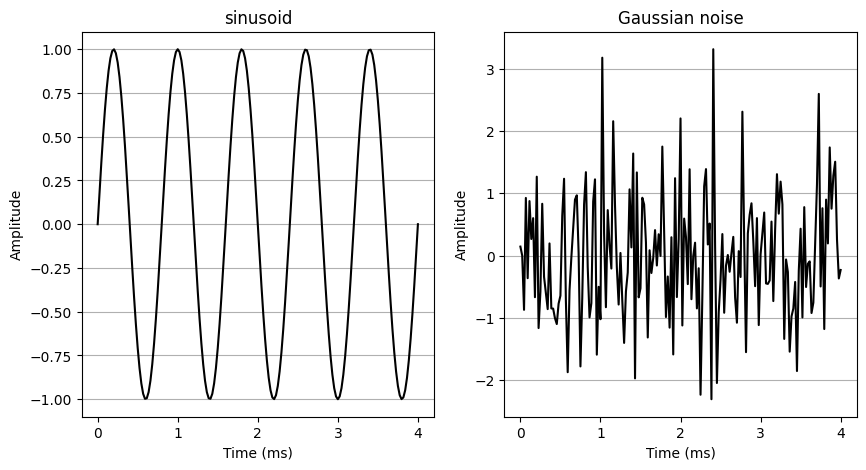

sinusoid: 
 - Zero-crossing rate:  2500.0
 - Energy:  88.0
 - RMS:  0.7051064751106303
 - Log-attack time:  2.2727272727272726e-05
 - Temporal centroid:  0.002
 - Effective duration:  1.0
 - Spectral centroid:  8.747032909988798
 - Spectral spread:  12.769312308506608
 - Spectral variation:  1.4598450057189691
 - Spectral flatness:  0.0011513550623770247
 - Spectral decrease:  0.0008051677393631603

Gaussian noise: 
 - Zero-crossing rate:  21750.0
 - Energy:  172.353355709916
 - RMS:  0.9867865890720277
 - Log-attack time:  0.0
 - Temporal centroid:  0.001021157953525556
 - Effective duration:  1.0
 - Spectral centroid:  43.57115175677497
 - Spectral spread:  24.8162694554971
 - Spectral variation:  0.5695573436761026
 - Spectral flatness:  0.009020546560324433
 - Spectral decrease:  0.0016228255559955353


In [23]:
fs = 44000 # sampling rate (Hz)
f = 1250 # frequency (Hz)
duration = 5/f # duration (s)


t = np.arange(0, duration, 1/fs) # time (s)
sinusoid = np.sin(2*np.pi*f*t) # signal
noise = np.random.normal(0, 1, len(t)) #gaussian noise


# Plot
fig = plt.figure(figsize=(10, 5)); 
plt.subplot(1,2,1); plt.plot(t*1000, sinusoid, color='black'); plt.xlabel('Time (ms)'); plt.ylabel('Amplitude'); plt.title('sinusoid'); plt.gca().yaxis.grid(True)
plt.subplot(1,2,2); plt.plot(t*1000, noise, color='black'); plt.xlabel('Time (ms)'); plt.ylabel('Amplitude'); plt.title('Gaussian noise');  plt.gca().yaxis.grid(True); plt.show()

#Save figure
fig.savefig('Figures/sine_&_Gnoise.png')


## sinusoid
print('sinusoid: ')

# Zero-crossing rate
zc = np.where(np.diff(np.sign(sinusoid)))[0] # zero-crossing rate
print(' - Zero-crossing rate: ', len(zc)/duration)

# Energy
energy = np.sum(sinusoid**2) # energy
print(' - Energy: ', energy)

# RMS
rms = np.sqrt(np.mean(sinusoid**2)) # RMS
print(' - RMS: ', rms)

# Log-attack time
lat = np.where(sinusoid > 0.01)[0][0] # log-attack time
print(' - Log-attack time: ', lat/fs)

# Temporal centroid
tc = np.sum(t*sinusoid**2)/np.sum(sinusoid**2) # temporal centroid
print(' - Temporal centroid: ', tc)

# Effective duration
ed = np.sum(sinusoid**2)/energy # effective duration
print(' - Effective duration: ', ed)

# Spectral centroid
sinusoid_fft = fft(sinusoid)
sinusoid_fft = sinusoid_fft[:int(len(sinusoid_fft)/2)]
sinusoid_fft = np.abs(sinusoid_fft)
sinusoid_fft = sinusoid_fft/np.sum(sinusoid_fft)
sc = np.sum(sinusoid_fft*np.arange(len(sinusoid_fft))) # spectral centroid
print(' - Spectral centroid: ', sc)

# Spectral spread
ss = np.sqrt(np.sum(sinusoid_fft*(np.arange(len(sinusoid_fft))-sc)**2)) # spectral spread
print(' - Spectral spread: ', ss)

# Spectral variation
sv = ss/sc # spectral variation
print(' - Spectral variation: ', sv)

# Spectral flatness
sf = np.exp(np.mean(np.log(sinusoid_fft))) # spectral flatness
print(' - Spectral flatness: ', sf)

# Spectral decrease
sd = np.sum(np.diff(sinusoid_fft)) # spectral decrease
print(' - Spectral decrease: ', sd)


## Gaussian noise
print('\nGaussian noise: ')
# Zero-crossing rate
zc = np.where(np.diff(np.sign(noise)))[0] # zero-crossing rate
print(' - Zero-crossing rate: ', len(zc)/duration)

# Energy
energy = np.sum(noise**2) # energy
print(' - Energy: ', energy)

# RMS
rms = np.sqrt(np.mean(noise**2)) # RMS
print(' - RMS: ', rms)

# Log-attack time
lat = np.where(noise > 0.01)[0][0] # log-attack time
print(' - Log-attack time: ', lat/fs)

# Temporal centroid
tc = np.sum(t*sinusoid**2)/np.sum(noise**2) # temporal centroid
print(' - Temporal centroid: ', tc)

# Effective duration
ed = np.sum(noise**2)/energy # effective duration
print(' - Effective duration: ', ed)

# Spectral centroid
noise_fft = fft(noise)
noise_fft = noise_fft[:int(len(noise_fft)/2)]
noise_fft = np.abs(noise_fft)
noise_fft = noise_fft/np.sum(noise_fft)
sc = np.sum(noise_fft*np.arange(len(noise_fft))) # spectral centroid
print(' - Spectral centroid: ', sc)

# Spectral spread
ss = np.sqrt(np.sum(noise_fft*(np.arange(len(noise_fft))-sc)**2)) # spectral spread
print(' - Spectral spread: ', ss)

# Spectral variation
sv = ss/sc # spectral variation
print(' - Spectral variation: ', sv)

# Spectral flatness
sf = np.exp(np.mean(np.log(noise_fft))) # spectral flatness
print(' - Spectral flatness: ', sf)

# Spectral decrease
sd = np.sum(np.diff(noise_fft)) # spectral decrease
print(' - Spectral decrease: ', sd)



## Task 2